In [1]:
"""Final Project
The goal of this project is to determine the distribution of the stellar material before, during, and after
the merger between the Milky Way and M31. This will be done using a Sersic profile to model the surface brighness 
distribution for the bulge and stellar disk for each galaxy individually.
James Taylor
ASTR400B"""

In [39]:
# Load Modules
import numpy as np
from astropy.constants import G
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile

# Part A : 

Create a function called `SersicE` that returns the Sersic Profile in terms of the effective radius $R_e$ (i.e. the half light radius).

$I(r) = I_e exp^{-7.67 ( (r/R_e)^{1/n} - 1)}$

Where 

$ L = 7.2 I_e \pi R_e^2$

and  $R_e$ is the half light radius.  We will assume a mass to light ratio for the stellar bulge of 1, so this is also the half mass radius.

The function should take as input: the radius, $R_e$, $n$ and the total stellar mass of the system.


In [3]:
  # Create a function that will return the Sersic Profile for an Elliptical System 
def SerSicR_Bulge(R,Re,n,Mtot):
    # Inputs 
    #    R: array of radii (kpc)
    #    Re: Half light radius (kpc)
    #    n: Sersic index
    #    Mtot: the total stellar mass (Msun)
    # Reutrns
    #    surface brightness profile in (Lsun/kpc^2)
    
    # Assuming a Mass/Light=1
    L = Mtot # total luminosity = total stellar mass
    
    # Ie=L/(7.2piRe^2)
    Ie = L/7.2*np.pi/Re**2
    # exponent
    A = (R/Re)**(1/n)-1
    return Ie*np.exp(-7.67*A)
    

In [4]:
 # Create a function that will return the Sersic Profile for the stellar disk
def SerSicR_Disk(R,Re,n,Mtot):
    # Inputs 
    #    R: array of radii (kpc)
    #    Re: Half light radius (kpc)
    #    n: Sersic index
    #    Mtot: the total stellar mass (Msun)
    # Reutrns
    #    surface brightness profile in (Lsun/kpc^2)
    
    # Assuming a Mass/Light=1
    L = Mtot # total luminosity = total stellar mass
    
    # Ie=L/(7.2piRe^2)
    Ie = L/(5/3)*np.pi/Re**2
    # exponent
    A = (R/Re)**(1/n)
    return Ie*np.exp(-7.67*A)
    

In [17]:
"""Picks a set of time snapshots in order to study times before, during, and after the merger event."""
M31_000 = MassProfile("M31",0)
M31_280 = MassProfile("M31",280)
M31_420 = MassProfile("M31",420)
M31_801 = MassProfile("M31",801)

MW_000 = MassProfile("M31",0)
MW_280 = MassProfile("M31",280)
MW_420 = MassProfile("M31",420)
MW_801 = MassProfile("M31",801)

In [18]:
"""Set up array of radii for both MW and M31"""
R_M31 = np.arange(0.1,60,0.1)
R_MW = np.arange(0.1,30,0.1)

In [19]:
"""Generate enclosed masses for each particle type for each galaxy"""
DiskMass_M31_000 = M31_000.MassEnclosed(2,R_M31)
BulgeMass_M31_000 = M31_000.MassEnclosed(3,R_M31)
DiskMass_M31_280 = M31_280.MassEnclosed(2,R_M31)
BulgeMass_M31_280 = M31_280.MassEnclosed(3,R_M31)
DiskMass_M31_420 = M31_420.MassEnclosed(2,R_M31)
BulgeMass_M31_420 = M31_420.MassEnclosed(3,R_M31)
DiskMass_M31_801 = M31_801.MassEnclosed(2,R_M31)
BulgeMass_M31_801 = M31_801.MassEnclosed(3,R_M31)
DiskMass_MW_000 = M31_000.MassEnclosed(2,R_MW)
BulgeMass_MW_000 = M31_000.MassEnclosed(3,R_MW)
DiskMass_MW_280 = M31_280.MassEnclosed(2,R_MW)
BulgeMass_MW_280 = M31_280.MassEnclosed(3,R_MW)
DiskMass_MW_420 = M31_420.MassEnclosed(2,R_MW)
BulgeMass_MW_420 = M31_420.MassEnclosed(3,R_MW)
DiskMass_MW_801 = M31_801.MassEnclosed(2,R_MW)
BulgeMass_MW_801 = M31_801.MassEnclosed(3,R_MW)

In [21]:
"""The maximum value for the mass array is the total value for the mass"""
DiskTotal_M31_000 = np.max(DiskMass_M31_000)
BulgeTotal_M31_000 = np.max(BulgeMass_M31_000)
DiskTotal_M31_280 = np.max(DiskMass_M31_280)
BulgeTotal_M31_280 = np.max(BulgeMass_M31_280)
DiskTotal_M31_420 = np.max(DiskMass_M31_420)
BulgeTotal_M31_420 = np.max(BulgeMass_M31_420)
DiskTotal_M31_801 = np.max(DiskMass_M31_801)
BulgeTotal_M31_801 = np.max(BulgeMass_M31_801)


DiskTotal_MW_000 = np.max(DiskMass_MW_000)
BulgeTotal_MW_000 = np.max(BulgeMass_MW_000)
DiskTotal_MW_280 = np.max(DiskMass_MW_280)
BulgeTotal_MW_280 = np.max(BulgeMass_MW_280)
DiskTotal_MW_420 = np.max(DiskMass_MW_420)
BulgeTotal_MW_420 = np.max(BulgeMass_MW_420)
DiskTotal_MW_801 = np.max(DiskMass_MW_801)
BulgeTotal_MW_801 = np.max(BulgeMass_MW_801)

In [263]:
"""Set a lower and uper limit in order to find the half light radius"""
Low_M31_Disk_000 = DiskTotal_M31_000/2
High_M31_Disk_000 = DiskTotal_M31_000/2 + DiskTotal_M31_000/2*0.005
Low_M31_Disk_280 = DiskTotal_M31_280/2
High_M31_Disk_280 = Low_M31_Disk_280/2 + Low_M31_Disk_280/2*0.005
Low_M31_Disk_420 = DiskTotal_M31_420/2
High_M31_Disk_420 = Low_M31_Disk_420/2 + Low_M31_Disk_420/2*0.005
Low_M31_Disk_801 = DiskTotal_M31_801/2
High_M31_Disk_801 = Low_M31_Disk_801/2 + Low_M31_Disk_801/2*0.005

Low_M31_Bulge_000 = BulgeTotal_M31_000/2
High_M31_Bulge_000 = Low_M31_Bulge_000/2 + Low_M31_Bulge_000/2*0.01
Low_M31_Bulge_280 = DiskTotal_M31_280/2
High_M31_Bulge_280 = Low_M31_Bulge_280/2 + Low_M31_Bulge_280/2*0.01
Low_M31_Bulge_420 = DiskTotal_M31_420/2
High_M31_Bulge_420 = Low_M31_Bulge_420/2 + Low_M31_Bulge_420/2*0.01
Low_M31_Bulge_801 = DiskTotal_M31_801/2
High_M31_Bulge_801 = Low_M31_Bulge_801/2 + Low_M31_Bulge_801/2*0.01

Low_MW_Disk_000 = DiskTotal_MW_000/2
High_MW_Disk_000 = Low_MW_Disk_000 + Low_MW_Disk_000*0.005
Low_MW_Disk_280 = DiskTotal_MW_280/2
High_MW_Disk_280 = Low_MW_Disk_280 + Low_MW_Disk_280*0.005
Low_MW_Disk_420 = DiskTotal_MW_420/2
High_MW_Disk_420 = Low_MW_Disk_420 + Low_MW_Disk_420*0.005
Low_MW_Disk_801 = DiskTotal_MW_801/2
High_MW_Disk_801 = Low_MW_Disk_801 + Low_MW_Disk_801*0.005

Low_MW_Bulge_000 = BulgeTotal_MW_000/2
High_MW_Bulge_000 = Low_MW_Bulge_000 + Low_MW_Bulge_000*0.01
Low_MW_Bulge_280 = DiskTotal_MW_280/2
High_MW_Bulge_280 = Low_MW_Bulge_280 + Low_MW_Bulge_280*0.01
Low_MW_Bulge_420 = DiskTotal_MW_420/2
High_MW_Bulge_420 = Low_MW_Bulge_420 + Low_MW_Bulge_420*0.01
Low_MW_Bulge_801 = DiskTotal_MW_801/2
High_MW_Bulge_801 = Low_MW_Bulge_801 + Low_MW_Bulge_801*0.01

In [264]:
"""Find the index for the half light radius"""
index_M31_Disk_000 = np.where( (DiskMass_M31_000> Low_M31_Disk_000) & (DiskMass_M31_000 < High_M31_Disk_000))
index_M31_Bulge_000 = np.where( (BulgeMass_M31_000> Low_M31_Bulge_000) & (BulgeMass_M31_000 < High_M31_Bulge_000))
index_M31_Disk_280 = np.where( (DiskMass_M31_000> Low_M31_Disk_000) & (DiskMass_M31_000 < High_M31_Disk_000))
index_M31_Bulge_280 = np.where( (BulgeMass_M31_000> Low_M31_Bulge_000) & (BulgeMass_M31_000 < High_M31_Bulge_000))
index_M31_Disk_420 = np.where( (DiskMass_M31_000> Low_M31_Disk_000) & (DiskMass_M31_000 < High_M31_Disk_000))
index_M31_Bulge_420 = np.where( (BulgeMass_M31_000> Low_M31_Bulge_000) & (BulgeMass_M31_000 < High_M31_Bulge_000))
index_M31_Disk_801 = np.where( (DiskMass_M31_000> Low_M31_Disk_000) & (DiskMass_M31_000 < High_M31_Disk_000))
index_M31_Bulge_801 = np.where( (BulgeMass_M31_000> Low_M31_Bulge_000) & (BulgeMass_M31_000 < High_M31_Bulge_000))

index_MW_Disk_000 = np.where( (DiskMass_MW_000> Low_MW_Disk_000) & (DiskMass_MW_000 < High_MW_Disk_000))
index_MW_Bulge_000 = np.where( (BulgeMass_MW_000> Low_MW_Bulge_000) & (BulgeMass_MW_000 < High_MW_Bulge_000))
index_MW_Disk_280 = np.where( (DiskMass_MW_000> Low_MW_Disk_000) & (DiskMass_MW_000 < High_MW_Disk_000))
index_MW_Bulge_280 = np.where( (BulgeMass_MW_000> Low_MW_Bulge_000) & (BulgeMass_MW_000 < High_MW_Bulge_000))
index_MW_Disk_420 = np.where( (DiskMass_MW_000> Low_MW_Disk_000) & (DiskMass_MW_000 < High_MW_Disk_000))
index_MW_Bulge_420 = np.where( (BulgeMass_MW_000> Low_MW_Bulge_000) & (BulgeMass_MW_000 < High_MW_Bulge_000))
index_MW_Disk_801 = np.where( (DiskMass_MW_000> Low_MW_Disk_000) & (DiskMass_MW_000 < High_MW_Disk_000))
index_MW_Bulge_801 = np.where( (BulgeMass_MW_000> Low_MW_Bulge_000) & (BulgeMass_MW_000 < High_MW_Bulge_000))


In [265]:
"""Get the half light radius for each particle type and time snapshot"""
Re_M31_Disk_000 = R_M31[index_M31_Disk_000]
Re_M31_Disk_280 = R_M31[index_M31_Disk_280]
Re_M31_Disk_420 = R_M31[index_M31_Disk_420]
Re_M31_Disk_801 = R_M31[index_M31_Disk_801]

Re_M31_Bulge_000 = R_M31[index_M31_Disk_000]
Re_M31_Bulge_280 = R_M31[index_M31_Disk_280]
Re_M31_Bulge_420 = R_M31[index_M31_Disk_420]
Re_M31_Bulge_801 = R_M31[index_M31_Disk_801]

Re_MW_Disk_000 = R_MW[index_MW_Disk_000]
Re_MW_Disk_280 = R_MW[index_MW_Disk_280]
Re_MW_Disk_420 = R_MW[index_MW_Disk_420]
Re_MW_Disk_801 = R_MW[index_MW_Disk_801]

Re_MW_Bulge_000 = R_MW[index_MW_Bulge_000]
Re_MW_Bulge_280 = R_MW[index_MW_Bulge_280]
Re_MW_Bulge_420 = R_MW[index_MW_Bulge_420]
Re_MW_Bulge_801 = R_MW[index_MW_Bulge_801]

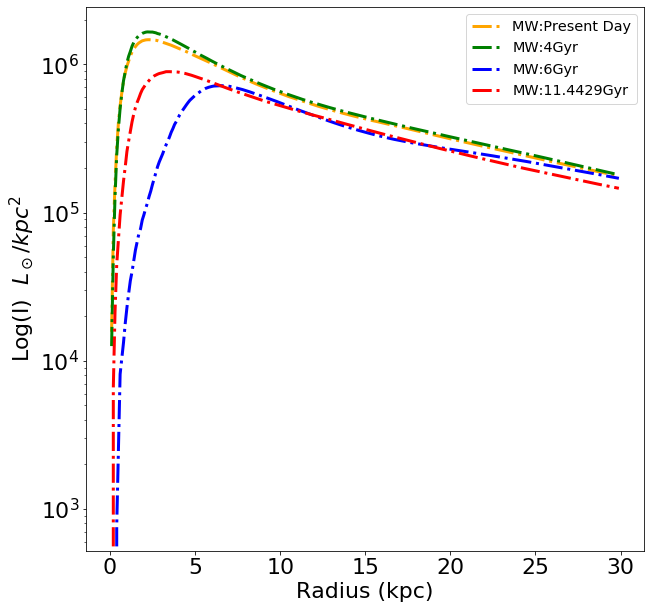

In [279]:
# Plot the Disk density profile for the Milky Way 
####################################
fit = SerSicR_Disk(R_MW,Re_MW_Disk_000,5.23,DiskMass_MW_000)
fit2 = SerSicR_Disk(R_MW,Re_MW_Disk_280,5.23,DiskMass_MW_280)
fit3 = SerSicR_Disk(R_MW,Re_MW_Disk_420,5.23,DiskMass_MW_420)
fit4 = SerSicR_Disk(R_MW,Re_MW_Disk_801,5.23,DiskMass_MW_801)

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

plt.semilogy(R_MW, fit, color = 'orange', linestyle = '-.',linewidth=3, label='MW:Present Day')
plt.semilogy(R_MW, fit2, color = 'green', linestyle = '-.',linewidth=3, label='MW:4Gyr')
plt.semilogy(R_MW, fit3, color = 'blue', linestyle = '-.',linewidth=3, label='MW:6Gyr')
plt.semilogy(R_MW, fit4, color = 'red', linestyle = '-.',linewidth=3, label='MW:11.4429Gyr')

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')
plt.savefig('MW_Disk.pdf')

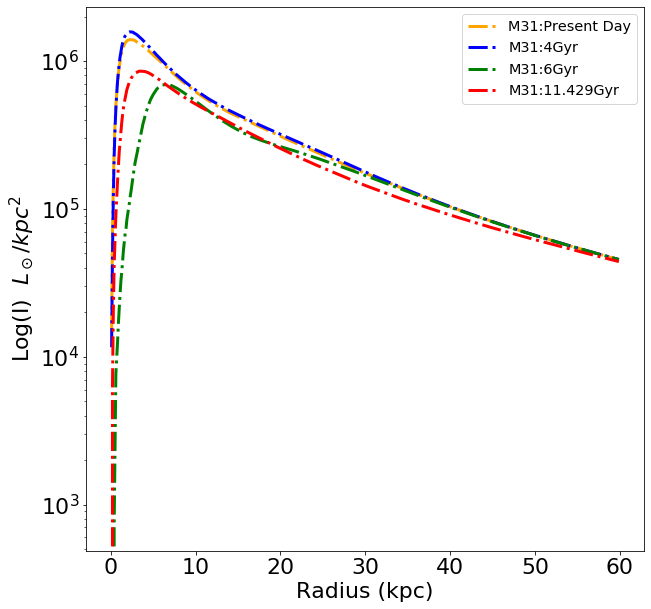

In [280]:
# Plot the Disk density profile for M31
####################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

plt.semilogy(R_M31,SerSicR_Disk(R_M31,Re_M31_Disk_000,5.23,DiskMass_M31_000), 
             color = 'orange', linestyle = '-.', linewidth=3, label='M31:Present Day')
plt.semilogy(R_M31,SerSicR_Disk(R_M31,Re_M31_Disk_280,5.23,DiskMass_M31_280), 
             color = 'blue', linestyle = '-.', linewidth=3, label='M31:4Gyr')
plt.semilogy(R_M31,SerSicR_Disk(R_M31,Re_M31_Disk_420,5.23,DiskMass_M31_420), 
             color = 'green', linestyle = '-.', linewidth=3, label='M31:6Gyr')
plt.semilogy(R_M31,SerSicR_Disk(R_M31,Re_M31_Disk_801,5.23,DiskMass_M31_801), 
             color = 'red', linestyle = '-.', linewidth=3, label='M31:11.429Gyr')

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')
plt.savefig('M31_Disk.pdf')

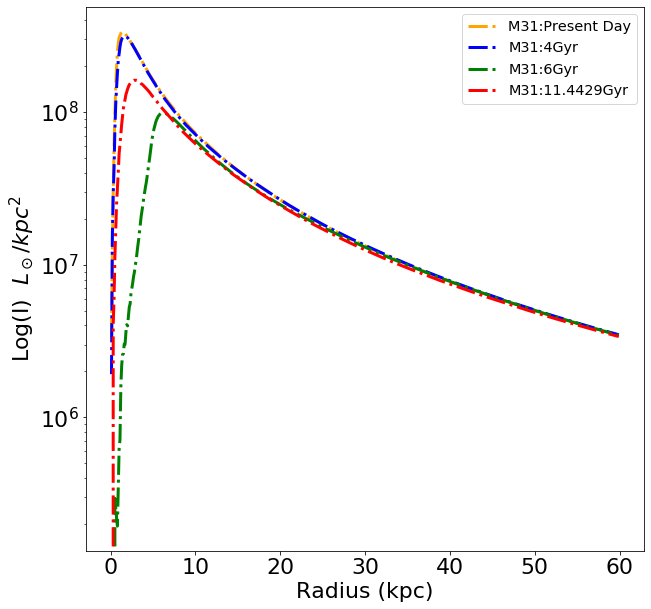

In [281]:
# Plot the Bulge density profile for M31
####################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

plt.semilogy(R_M31,SerSicR_Bulge(R_M31,Re_M31_Bulge_000,5.23,BulgeMass_M31_000), 
             color = 'orange', linestyle = '-.', linewidth=3, label='M31:Present Day')
plt.semilogy(R_M31,SerSicR_Bulge(R_M31,Re_M31_Bulge_280,5.23,BulgeMass_M31_280), 
             color = 'blue', linestyle = '-.', linewidth=3, label='M31:4Gyr')
plt.semilogy(R_M31,SerSicR_Bulge(R_M31,Re_M31_Bulge_420,5.23,BulgeMass_M31_420), 
             color = 'green', linestyle = '-.', linewidth=3, label='M31:6Gyr')
plt.semilogy(R_M31,SerSicR_Bulge(R_M31,Re_M31_Bulge_801,5.23,BulgeMass_M31_801), 
             color = 'red', linestyle = '-.', linewidth=3, label='M31:11.4429Gyr')

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')
plt.savefig('M31_Bulge.pdf')

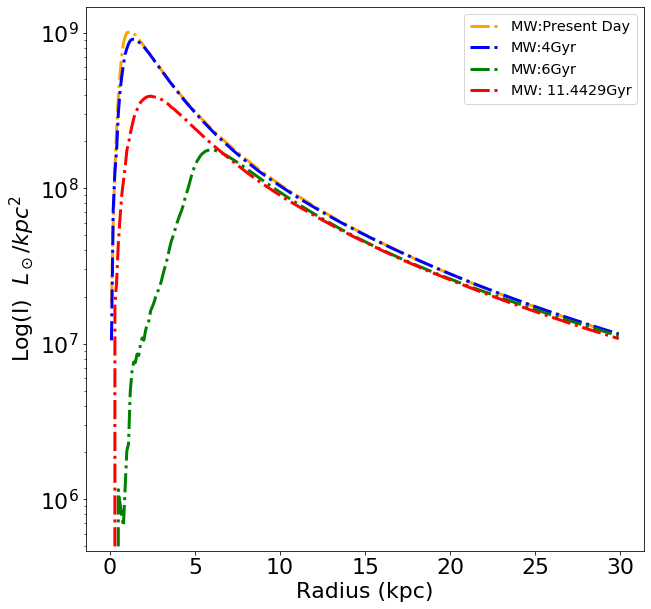

In [284]:
# Plot the Bulge profile for the Milky Way
####################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

plt.semilogy(R_MW,SerSicR_Bulge(R_MW,Re_MW_Bulge_000,5.23,BulgeMass_MW_000), 
             color = 'orange', linestyle = '-.', linewidth=3, label='MW:Present Day')
plt.semilogy(R_MW,SerSicR_Bulge(R_MW,Re_MW_Bulge_280,5.23,BulgeMass_MW_280), 
             color = 'blue', linestyle = '-.', linewidth=3, label='MW:4Gyr')
plt.semilogy(R_MW,SerSicR_Bulge(R_MW,Re_MW_Bulge_420,5.23,BulgeMass_MW_420), 
             color = 'green', linestyle = '-.', linewidth=3, label='MW:6Gyr')
plt.semilogy(R_MW,SerSicR_Bulge(R_MW,Re_MW_Bulge_801,5.23,BulgeMass_MW_801), 
             color = 'red', linestyle = '-.', linewidth=3, label='MW: 11.4429Gyr')

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')
plt.savefig('MW_Bulge_2.pdf')